# Cross-validation 
It is a technique used in machine learning to assess the performance and generalizability of a model. It involves partitioning the dataset into subsets for training and testing, allowing multiple rounds of training and evaluation. Here are some common cross-validation techniques:

### K-Fold Cross-Validation:

The dataset is divided into k equally-sized folds.
The model is trained k times, each time using k-1 folds for training and the remaining fold for testing.
The performance is averaged over the k iterations to obtain a more robust estimate.

### Stratified K-Fold Cross-Validation:

Similar to k-fold cross-validation, but it ensures that each fold maintains the same class distribution as the entire dataset.
Particularly useful when dealing with imbalanced datasets.

### Leave-One-Out Cross-Validation (LOOCV):

Each data point is used as a test set exactly once.
The model is trained on all data points except one, and the performance is evaluated on the single data point left out.
Can be computationally expensive for large datasets but provides a more accurate estimate.

### Shuffle Split Cross-Validation:

    
The dataset is randomly shuffled and split into training and testing sets.
This process is repeated a specified number of times, allowing for multiple train/test splits.

### Time Series Cross-Validation:

Suitable for time-ordered data where the order of observations matters.
The training set consists of data up to a certain point in time, and the test set includes data after that point.
Helps simulate real-world scenarios where the model is trained on past data and tested on future data.

### Group K-Fold Cross-Validation:

Useful when dealing with groups or clusters in the data.
Ensures that all instances from the same group are either in the training or testing set, preventing information leakage.

### Nested Cross-Validation:

Combines cross-validation with hyperparameter tuning.
The outer loop performs k-fold cross-validation, while the inner loop optimizes model hyperparameters.
Helps provide a more accurate estimate of model performance and avoids overfitting hyperparameters to a specific dataset.
Repeated Cross-Validation:

Repeats k-fold cross-validation multiple times with different random splits.
Averages the performance across repetitions, providing a more stable estimate.

In [3]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, TimeSeriesSplit, GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset for demonstration
iris = load_iris()
X = iris.data
y = iris.target

# Create a Logistic Regression classifier
clf = LogisticRegression(max_iter=500, random_state=42)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results_kfold = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
print(f'K-Fold Cross-Validation Results: {cv_results_kfold}')
print(f'Mean Accuracy: {cv_results_kfold.mean():.3f}')

K-Fold Cross-Validation Results: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Accuracy: 0.973


In [4]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_stratified = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
print(f'Stratified K-Fold Cross-Validation Results: {cv_results_stratified}')
print(f'Mean Accuracy: {cv_results_stratified.mean():.3f}')

Stratified K-Fold Cross-Validation Results: [1.         0.96666667 0.93333333 1.         0.93333333]
Mean Accuracy: 0.967


In [5]:
# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
cv_results_loo = cross_val_score(clf, X, y, cv=loo, scoring='accuracy')
print(f'Leave-One-Out Cross-Validation Results: {cv_results_loo}')
print(f'Mean Accuracy: {cv_results_loo.mean():.3f}')

Leave-One-Out Cross-Validation Results: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 0.967


In [6]:
# Shuffle Split Cross-Validation
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cv_results_shuffle = cross_val_score(clf, X, y, cv=ss, scoring='accuracy')
print(f'Shuffle Split Cross-Validation Results: {cv_results_shuffle}')
print(f'Mean Accuracy: {cv_results_shuffle.mean():.3f}')

Shuffle Split Cross-Validation Results: [1.         0.96666667 0.96666667 0.93333333 0.93333333]
Mean Accuracy: 0.960


In [7]:
# Time Series Cross-Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tscv = TimeSeriesSplit(n_splits=5)
cv_results_timeseries = cross_val_score(clf, X_train, y_train, cv=tscv, scoring='accuracy')
print(f'Time Series Cross-Validation Results: {cv_results_timeseries}')
print(f'Mean Accuracy: {cv_results_timeseries.mean():.3f}')

Time Series Cross-Validation Results: [1.   0.9  0.95 1.   0.95]
Mean Accuracy: 0.960


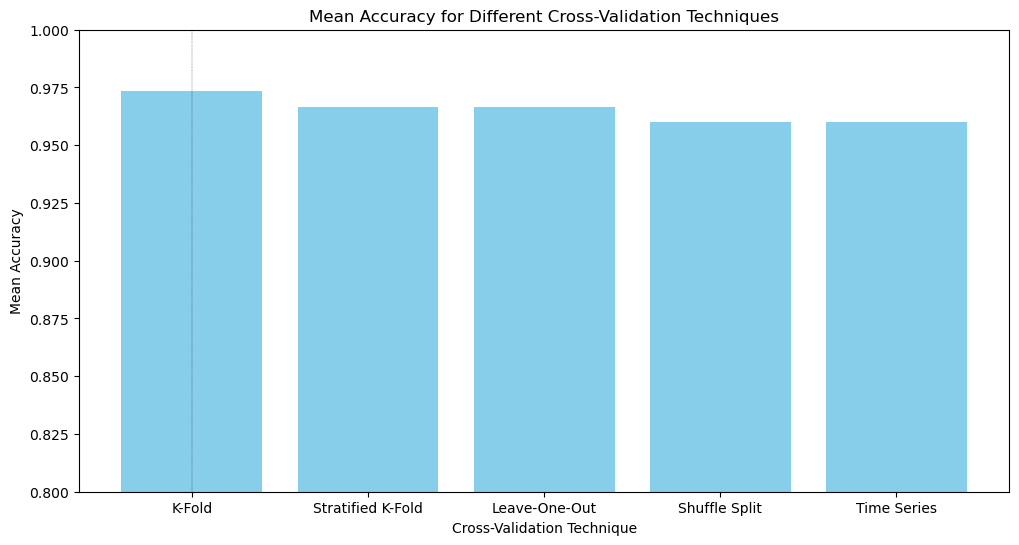

In [26]:
import matplotlib.pyplot as plt

# Mean accuracy results from different cross-validation techniques
mean_accuracies = [cv_results_kfold.mean(), cv_results_stratified.mean(), cv_results_loo.mean(),
                   cv_results_shuffle.mean(), cv_results_timeseries.mean()]

# Cross-validation techniques
cv_techniques = ['K-Fold', 'Stratified K-Fold', 'Leave-One-Out', 'Shuffle Split', 'Time Series']
# Increase the figure size width
plt.figure(figsize=(12, 6))
# Create a bar chart
plt.bar(cv_techniques, mean_accuracies, color='skyblue')
plt.axvline(0, color='black', linewidth=0.2, linestyle='--')
plt.title('Mean Accuracy for Different Cross-Validation Techniques')
plt.xlabel('Cross-Validation Technique')
plt.ylabel('Mean Accuracy')
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits for better visualization
plt.show()

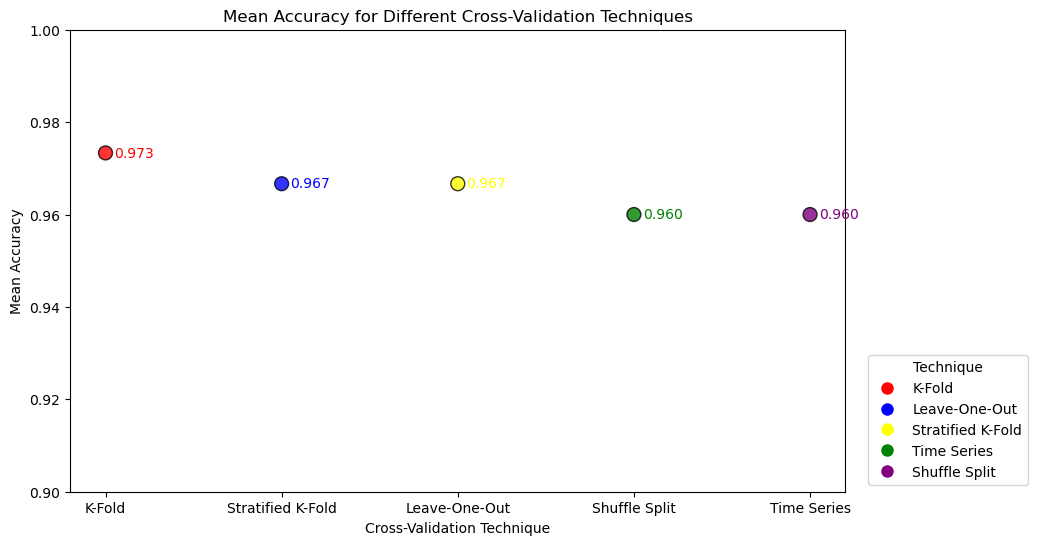

In [47]:
import matplotlib.pyplot as plt

# Cross-validation techniques
cv_techniques = ['K-Fold', 'Stratified K-Fold', 'Leave-One-Out', 'Shuffle Split', 'Time Series']

# Mean accuracy results from different cross-validation techniques
mean_accuracies = [cv_results_kfold.mean(), cv_results_stratified.mean(), cv_results_loo.mean(),
                   cv_results_shuffle.mean(), cv_results_timeseries.mean()]

# Colors for each technique
colors = ['red', 'blue', 'yellow', 'green', 'purple']

# Scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
scatter = plt.scatter(range(1, 6), mean_accuracies, c=colors, s=100, alpha=0.8, edgecolors='black')

# Line for reference
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Customize plot aesthetics
plt.title('Mean Accuracy for Different Cross-Validation Techniques')
plt.xlabel('Cross-Validation Technique')
plt.ylabel('Mean Accuracy')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limits for better visualization
plt.xticks(range(1, 6), cv_techniques)  # Set x-axis ticks

# Create a custom legend based on unique colors
legend_labels = set(cv_techniques)  # Unique technique labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]

# Add data labels next to each point
for i, (txt, color) in enumerate(zip(mean_accuracies, colors)):
    plt.text(i + 1.05, txt, f'{txt:.3f}', color=color, verticalalignment='center')

# Add the custom legend
plt.legend(legend_handles, legend_labels, title='Technique', loc='lower left', bbox_to_anchor=(1.02, 0))

plt.show()
